<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [95]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pickle
def savefile(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"))
def openfile(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp

In [0]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [0]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5,1,'Estimators vs score at depth of 5')

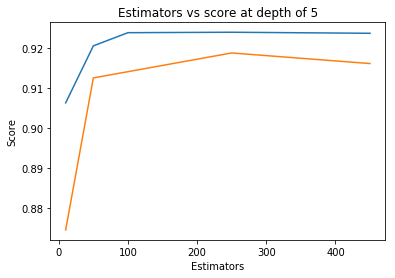

In [0]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


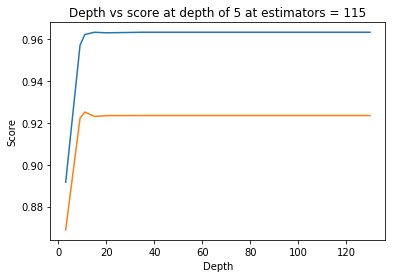

In [0]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [0]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [70]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [0]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [79]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


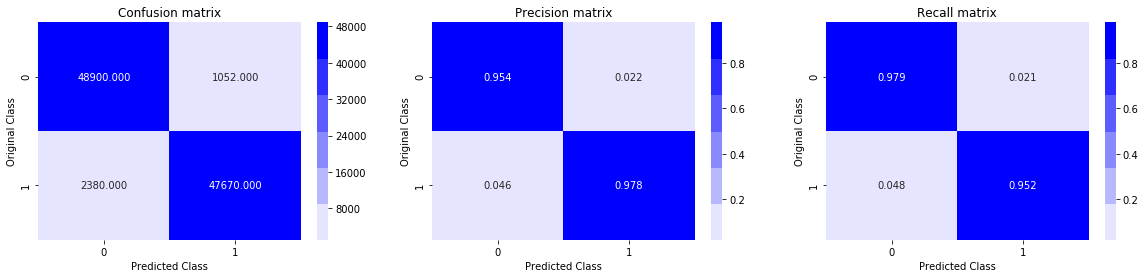

Test confusion_matrix


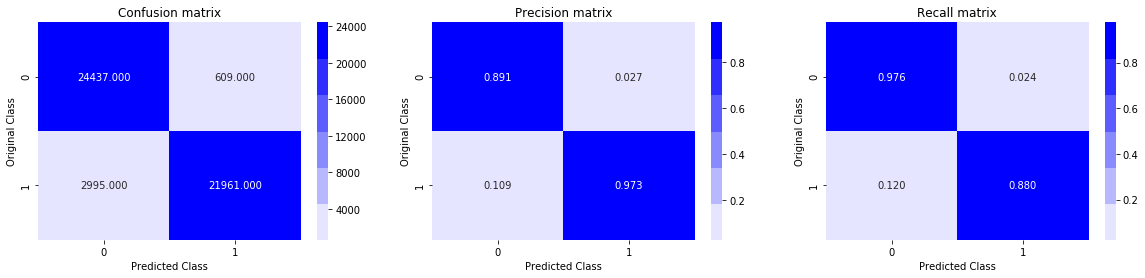

In [0]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

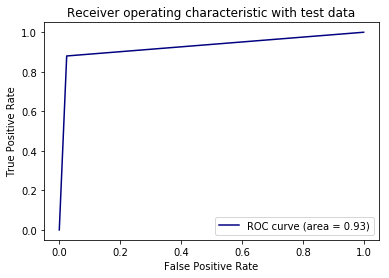

In [0]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

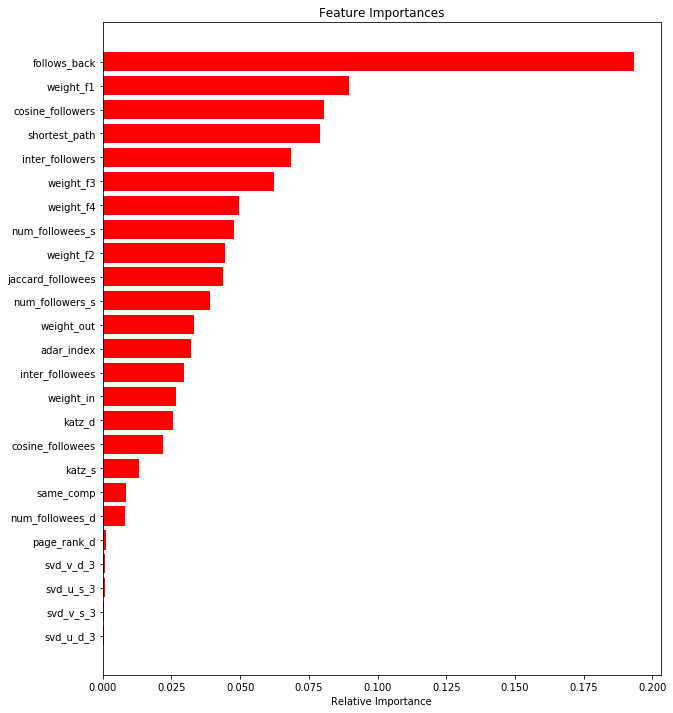

In [0]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Following Embeddings :

In [42]:
from pandas import read_hdf
df_final_train = read_hdf('fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [45]:
df_final_train.shape

(100002, 54)

In [51]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-2.380564e-19,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,6.058498e-11,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,1.197283e-07,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## Loading of embedding in word2vec format :

In [52]:
import node2vec
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
from tqdm import tqdm

In [53]:
model = KeyedVectors.load_word2vec_format('node2vec/emb/new_pos.emd')

In [54]:
model.most_similar('273084')

[('1390118', 0.9838650226593018),
 ('1491709', 0.9837545156478882),
 ('513824', 0.9834704399108887),
 ('1722322', 0.9826036095619202),
 ('1825785', 0.9823707342147827),
 ('1088342', 0.9823421239852905),
 ('526117', 0.9822683334350586),
 ('1657740', 0.9822132587432861),
 ('1283924', 0.9821736216545105),
 ('125010', 0.9819611310958862)]

In [55]:
df_final_train = df_final_train[['source_node','destination_node','indicator_link']]
df_final_test = df_final_test[['source_node','destination_node','indicator_link']]

In [56]:
df_final_train.values[0]

array([ 273084, 1505602,       1])

## Creating edge embedding from node embeddings for train and test data :

In [57]:
edge_vectors = []
for i in tqdm(df_final_train.values) :
    ver1 = i[0]
    ver2 = i[1]
    cnt = 0
    vertex = [ver1,ver2]
    edge_vec = np.zeros(128)
    
    for j in vertex :
        try :
            wvec = model.get_vector(str(j))
            edge_vec += wvec
            cnt +=1
        except :
            pass
    edge_vec /=cnt
    edge_vectors.append(edge_vec)
            


100%|██████████| 100002/100002 [00:01<00:00, 75071.07it/s]


In [58]:
edge_vectors = np.array(edge_vectors)

In [59]:
edge_vectors_test = []
for i in tqdm(df_final_test.values) :
    ver1 = i[0]
    ver2 = i[1]
    cnt = 0
    vertex = [ver1,ver2]
    edge_vec = np.zeros(128)
    
    for j in vertex :
        try :
            wvec = model.get_vector(str(j))
            edge_vec += wvec
            cnt +=1
        except :
            pass
    edge_vec /=cnt
    edge_vectors_test.append(edge_vec)

100%|██████████| 50002/50002 [00:00<00:00, 75564.69it/s]


In [60]:
edge_vectors_test = np.array(edge_vectors_test)

In [61]:
train_embedding = pd.DataFrame(edge_vectors,columns=[i+3 for i in range(0,128)])
train_embedding.head()

,3,4,5,6,7,8,9,10,11,12,...,121,122,123,124,125,126,127,128,129,130
0,0.009304,0.013118,-0.018205,0.015060,-0.010961,0.031516,0.027247,-0.015310,0.021423,0.007341,...,-0.005579,-0.008659,-0.014272,0.014509,-0.001722,-0.010319,0.007635,-0.014597,0.003602,0.000186
1,0.014441,0.011100,-0.017075,0.016919,-0.007768,0.026488,0.022953,-0.017018,0.023200,0.015034,...,-0.001648,-0.007612,-0.012861,0.018484,0.000736,-0.013461,0.005466,-0.008630,0.005699,-0.004435
2,0.010821,0.001990,-0.007127,0.005882,-0.009277,0.025136,0.014601,-0.007524,0.010576,0.008099,...,-0.004804,-0.003567,-0.007878,0.003806,-0.002835,-0.009189,0.005472,-0.009448,0.005556,0.005362
3,0.004034,0.001537,-0.002309,0.007524,0.000309,0.008979,0.007008,-0.009467,0.007156,0.003869,...,-0.004793,-0.003733,-0.001927,0.002474,0.000703,-0.005334,0.000125,-0.001977,0.000346,-0.000660
4,0.001925,0.003343,-0.005143,0.004659,-0.001998,0.007819,0.008267,-0.005833,0.005259,0.000695,...,0.000812,-0.000655,-0.001371,0.002236,0.001224,-0.003747,0.002190,-0.002461,0.001857,0.002140


In [62]:
test_embedding = pd.DataFrame(edge_vectors_test,columns=[i+3 for i in range(0,128)])
test_embedding.head()

,3,4,5,6,7,8,9,10,11,12,...,121,122,123,124,125,126,127,128,129,130
0,0.005124,0.010396,-0.010522,0.001952,-0.007559,0.011917,0.012621,-0.003690,0.011073,0.000297,...,-0.000623,-0.001019,-0.006794,0.004154,-0.003695,-0.005639,0.011552,-0.004947,0.002586,-0.004375
1,0.010145,0.006070,-0.006198,0.010113,-0.003824,0.016162,0.013778,-0.002677,0.012616,0.001864,...,0.003625,-0.000494,-0.008509,0.004441,-0.003612,-0.006989,0.005485,-0.005047,0.000125,0.002170
2,0.005932,-0.000263,-0.002085,0.004394,-0.000516,0.007332,0.009457,-0.005056,0.013390,0.004597,...,-0.005471,-0.003684,-0.001354,0.004698,0.000645,-0.003521,-0.003008,0.000949,-0.001897,0.006375
3,0.004337,0.001516,-0.002693,0.002332,0.000112,0.010922,0.009336,-0.009098,0.010318,0.004062,...,0.000883,0.002027,-0.005416,0.000077,0.004971,-0.007080,0.000834,-0.002728,-0.002319,0.000597
4,0.002354,0.004463,-0.004045,0.000599,-0.000433,0.009144,0.003973,-0.005632,0.008239,0.002475,...,0.000779,-0.000837,-0.000160,0.006120,-0.001252,-0.003041,0.002102,-0.000264,0.003801,0.002498


In [63]:
train_embedding.fillna(0,inplace=True)
train_embedding.head()

,3,4,5,6,7,8,9,10,11,12,...,121,122,123,124,125,126,127,128,129,130
0,0.009304,0.013118,-0.018205,0.015060,-0.010961,0.031516,0.027247,-0.015310,0.021423,0.007341,...,-0.005579,-0.008659,-0.014272,0.014509,-0.001722,-0.010319,0.007635,-0.014597,0.003602,0.000186
1,0.014441,0.011100,-0.017075,0.016919,-0.007768,0.026488,0.022953,-0.017018,0.023200,0.015034,...,-0.001648,-0.007612,-0.012861,0.018484,0.000736,-0.013461,0.005466,-0.008630,0.005699,-0.004435
2,0.010821,0.001990,-0.007127,0.005882,-0.009277,0.025136,0.014601,-0.007524,0.010576,0.008099,...,-0.004804,-0.003567,-0.007878,0.003806,-0.002835,-0.009189,0.005472,-0.009448,0.005556,0.005362
3,0.004034,0.001537,-0.002309,0.007524,0.000309,0.008979,0.007008,-0.009467,0.007156,0.003869,...,-0.004793,-0.003733,-0.001927,0.002474,0.000703,-0.005334,0.000125,-0.001977,0.000346,-0.000660
4,0.001925,0.003343,-0.005143,0.004659,-0.001998,0.007819,0.008267,-0.005833,0.005259,0.000695,...,0.000812,-0.000655,-0.001371,0.002236,0.001224,-0.003747,0.002190,-0.002461,0.001857,0.002140


In [64]:
test_embedding.fillna(0,inplace=True)
test_embedding.head()

,3,4,5,6,7,8,9,10,11,12,...,121,122,123,124,125,126,127,128,129,130
0,0.005124,0.010396,-0.010522,0.001952,-0.007559,0.011917,0.012621,-0.003690,0.011073,0.000297,...,-0.000623,-0.001019,-0.006794,0.004154,-0.003695,-0.005639,0.011552,-0.004947,0.002586,-0.004375
1,0.010145,0.006070,-0.006198,0.010113,-0.003824,0.016162,0.013778,-0.002677,0.012616,0.001864,...,0.003625,-0.000494,-0.008509,0.004441,-0.003612,-0.006989,0.005485,-0.005047,0.000125,0.002170
2,0.005932,-0.000263,-0.002085,0.004394,-0.000516,0.007332,0.009457,-0.005056,0.013390,0.004597,...,-0.005471,-0.003684,-0.001354,0.004698,0.000645,-0.003521,-0.003008,0.000949,-0.001897,0.006375
3,0.004337,0.001516,-0.002693,0.002332,0.000112,0.010922,0.009336,-0.009098,0.010318,0.004062,...,0.000883,0.002027,-0.005416,0.000077,0.004971,-0.007080,0.000834,-0.002728,-0.002319,0.000597
4,0.002354,0.004463,-0.004045,0.000599,-0.000433,0.009144,0.003973,-0.005632,0.008239,0.002475,...,0.000779,-0.000837,-0.000160,0.006120,-0.001252,-0.003041,0.002102,-0.000264,0.003801,0.002498


### Concating train and test data to their respective embeddings :

In [65]:
df_train = pd.concat([df_final_train,train_embedding],axis=1)
df_train.head()

,source_node,destination_node,indicator_link,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,273084,1505602,1,0.009304,0.013118,-0.018205,0.015060,-0.010961,0.031516,0.027247,...,-0.005579,-0.008659,-0.014272,0.014509,-0.001722,-0.010319,0.007635,-0.014597,0.003602,0.000186
1,832016,1543415,1,0.014441,0.011100,-0.017075,0.016919,-0.007768,0.026488,0.022953,...,-0.001648,-0.007612,-0.012861,0.018484,0.000736,-0.013461,0.005466,-0.008630,0.005699,-0.004435
2,1325247,760242,1,0.010821,0.001990,-0.007127,0.005882,-0.009277,0.025136,0.014601,...,-0.004804,-0.003567,-0.007878,0.003806,-0.002835,-0.009189,0.005472,-0.009448,0.005556,0.005362
3,1368400,1006992,1,0.004034,0.001537,-0.002309,0.007524,0.000309,0.008979,0.007008,...,-0.004793,-0.003733,-0.001927,0.002474,0.000703,-0.005334,0.000125,-0.001977,0.000346,-0.000660
4,140165,1708748,1,0.001925,0.003343,-0.005143,0.004659,-0.001998,0.007819,0.008267,...,0.000812,-0.000655,-0.001371,0.002236,0.001224,-0.003747,0.002190,-0.002461,0.001857,0.002140


In [66]:
df_test = pd.concat([df_final_test,test_embedding],axis=1)
df_test.head()

,source_node,destination_node,indicator_link,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,848424,784690,1,0.005124,0.010396,-0.010522,0.001952,-0.007559,0.011917,0.012621,...,-0.000623,-0.001019,-0.006794,0.004154,-0.003695,-0.005639,0.011552,-0.004947,0.002586,-0.004375
1,483294,1255532,1,0.010145,0.006070,-0.006198,0.010113,-0.003824,0.016162,0.013778,...,0.003625,-0.000494,-0.008509,0.004441,-0.003612,-0.006989,0.005485,-0.005047,0.000125,0.002170
2,626190,1729265,1,0.005932,-0.000263,-0.002085,0.004394,-0.000516,0.007332,0.009457,...,-0.005471,-0.003684,-0.001354,0.004698,0.000645,-0.003521,-0.003008,0.000949,-0.001897,0.006375
3,947219,425228,1,0.004337,0.001516,-0.002693,0.002332,0.000112,0.010922,0.009336,...,0.000883,0.002027,-0.005416,0.000077,0.004971,-0.007080,0.000834,-0.002728,-0.002319,0.000597
4,991374,975044,1,0.002354,0.004463,-0.004045,0.000599,-0.000433,0.009144,0.003973,...,0.000779,-0.000837,-0.000160,0.006120,-0.001252,-0.003041,0.002102,-0.000264,0.003801,0.002498


## Training :

In [67]:
y_train = df_train.indicator_link.values
y_test = df_test.indicator_link.values

In [68]:
df_train.drop(['source_node','destination_node','indicator_link'],axis=1,inplace=True)
df_test.drop(['source_node','destination_node','indicator_link'],axis=1,inplace=True)

In [69]:
df_train.head()

,3,4,5,6,7,8,9,10,11,12,...,121,122,123,124,125,126,127,128,129,130
0,0.009304,0.013118,-0.018205,0.015060,-0.010961,0.031516,0.027247,-0.015310,0.021423,0.007341,...,-0.005579,-0.008659,-0.014272,0.014509,-0.001722,-0.010319,0.007635,-0.014597,0.003602,0.000186
1,0.014441,0.011100,-0.017075,0.016919,-0.007768,0.026488,0.022953,-0.017018,0.023200,0.015034,...,-0.001648,-0.007612,-0.012861,0.018484,0.000736,-0.013461,0.005466,-0.008630,0.005699,-0.004435
2,0.010821,0.001990,-0.007127,0.005882,-0.009277,0.025136,0.014601,-0.007524,0.010576,0.008099,...,-0.004804,-0.003567,-0.007878,0.003806,-0.002835,-0.009189,0.005472,-0.009448,0.005556,0.005362
3,0.004034,0.001537,-0.002309,0.007524,0.000309,0.008979,0.007008,-0.009467,0.007156,0.003869,...,-0.004793,-0.003733,-0.001927,0.002474,0.000703,-0.005334,0.000125,-0.001977,0.000346,-0.000660
4,0.001925,0.003343,-0.005143,0.004659,-0.001998,0.007819,0.008267,-0.005833,0.005259,0.000695,...,0.000812,-0.000655,-0.001371,0.002236,0.001224,-0.003747,0.002190,-0.002461,0.001857,0.002140


## XGBoost :

In [80]:
clf = xgb.XGBClassifier()

In [81]:
clf.fit(df_train,y_train)
y_train_pred = clf.predict(df_train)
y_test_pred = clf.predict(df_test)

In [82]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9505905174873053
Test f1 score 0.9467658190532342


Train confusion_matrix


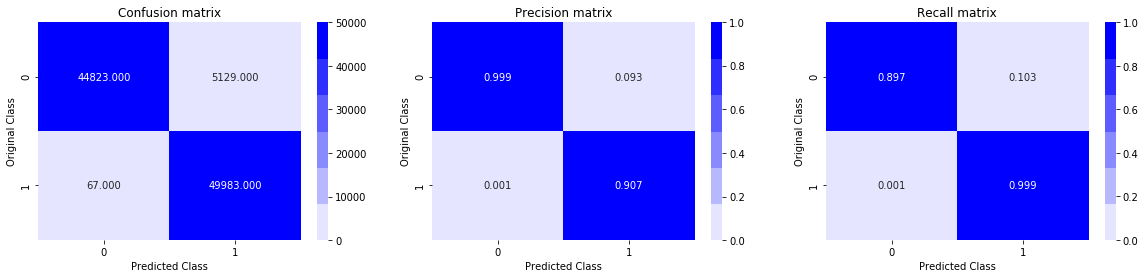

Test confusion_matrix


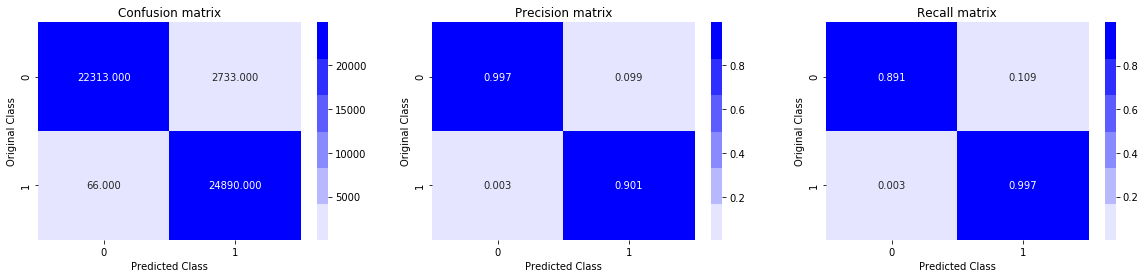

In [83]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

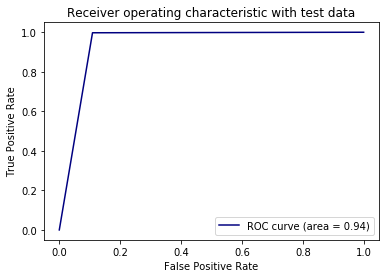

In [84]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

## Random Forest Classifier :

In [85]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [86]:
clf.fit(df_train,y_train)
y_train_pred = clf.predict(df_train)
y_test_pred = clf.predict(df_test)

In [87]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9391056315562312
Test f1 score 0.9377783624302333


Train confusion_matrix


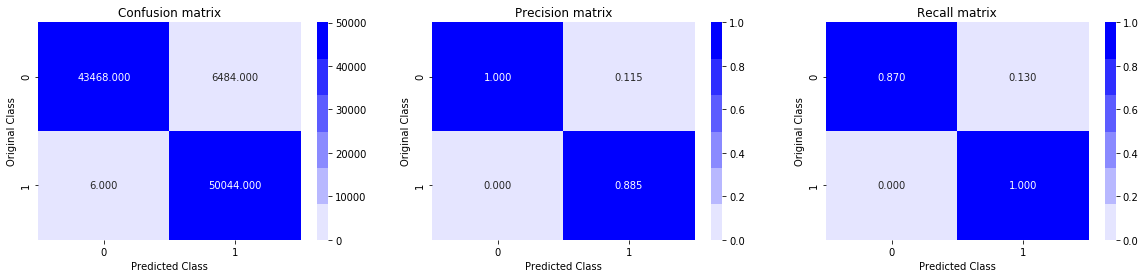

Test confusion_matrix


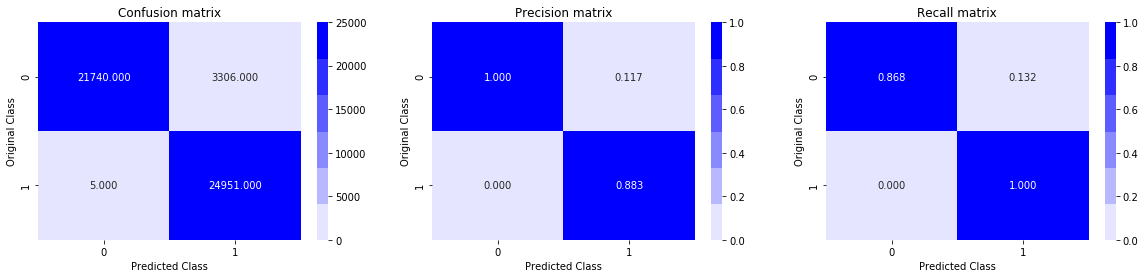

In [88]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

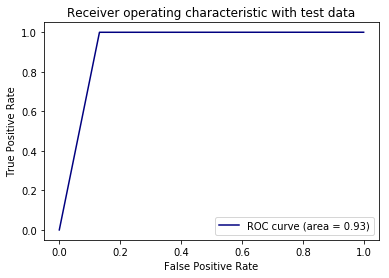

In [89]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

## Lightgbm Classifier :

In [91]:
import lightgbm as lgb

In [92]:
clf = lgb.LGBMClassifier()

In [93]:
clf.fit(df_train,y_train)
y_train_pred = clf.predict(df_train)
y_test_pred = clf.predict(df_test)

In [94]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9705699522125957
Test f1 score 0.956696101492307


## Lightgbm with Hyperparameter Tuning:

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
    
clf = lgb.LGBMClassifier()
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators' : [5, 10, 50, 100, 200, 500, 1000] }
#Using GridSearchCV
model = GridSearchCV(clf, param_grid, scoring = 'f1', cv=3 , verbose=1 ,n_jobs=-1)
model.fit(df_train,y_train)
savefile(model,"lightgbm_gridsearch")
print(model.best_estimator_)
print(model.score(df_train,y_train))   
# weight = model.coef_
    
 

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed: 17.9min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=4,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
0.9957226698497961


{'max_depth': 4, 'n_estimators': 1000}


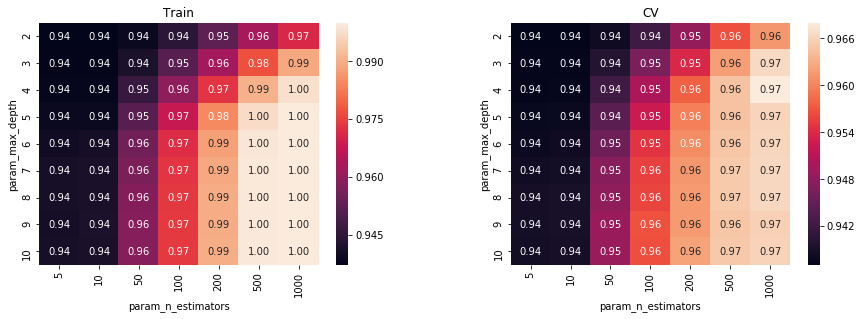

param_n_estimators,5,10,50,100,200,500,1000
param_max_depth,,,,,,,
2,0.937096,0.937062,0.938342,0.942232,0.948549,0.956678,0.961345
3,0.937339,0.937350,0.940025,0.946625,0.953889,0.961879,0.966514
4,0.937380,0.937436,0.942148,0.950327,0.957716,0.964638,0.967986
5,0.937733,0.937857,0.944362,0.952486,0.959656,0.964663,0.966130
6,0.937892,0.938309,0.945874,0.954703,0.960721,0.964854,0.966253
7,0.938470,0.938607,0.947605,0.955769,0.961349,0.965233,0.966338
8,0.938820,0.939036,0.948234,0.955981,0.961702,0.965256,0.966336
9,0.938695,0.939010,0.948931,0.956786,0.961693,0.964909,0.965767
10,0.938569,0.938960,0.948785,0.956561,0.962280,0.965091,0.965995


In [97]:
gsv = openfile('lightgbm_gridsearch')
print (gsv.best_params_)
# print (pd.DataFrame(gsv.cv_results_))
pvt = pd.pivot_table(pd.DataFrame(gsv.cv_results_),values='mean_test_score', index='param_max_depth', columns='param_n_estimators')
pvt2 = pd.pivot_table(pd.DataFrame(gsv.cv_results_),values='mean_train_score', index='param_max_depth', columns='param_n_estimators')
sns.heatmap(pvt)
# sns.heatmap(pvt2)

plt.subplot(1,2 ,1)
plt.title('Train')
sns.heatmap(pvt2,annot=True,fmt=".2f")

plt.subplot(1,2, 2)
plt.title('CV')
sns.heatmap(pvt,annot=True,fmt=".2f")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2, hspace=0.25,
                    wspace=0.35)
plt.show()
pvt.head(10)

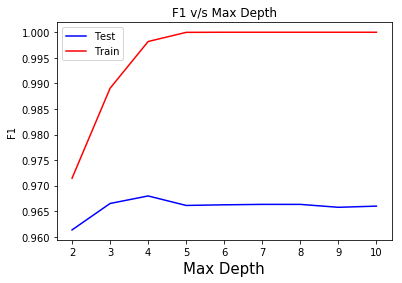

In [99]:
gsv = openfile('lightgbm_gridsearch')

x1=[]
y1=[]
x2=[]
y2=[]
gsv.cv_results_
means = gsv.cv_results_['mean_test_score']
means_train = gsv.cv_results_['mean_train_score']
stds = gsv.cv_results_['std_test_score']
for mean, mean_train ,  std, params in zip(means, means_train,stds, gsv.cv_results_['params']):

    if params['n_estimators'] == 1000:
        x1.append(params['max_depth'])
        y1.append(mean)
        x2.append(params['max_depth'])
        y2.append(mean_train)

        

plt.xlabel("Max Depth",fontsize=15)
plt.ylabel("F1")
plt.title('F1 v/s Max Depth')

plt.plot(x1,y1,'b',label="Test")
plt.plot(x2,y2,'r',label="Train")
plt.legend()
plt.show()

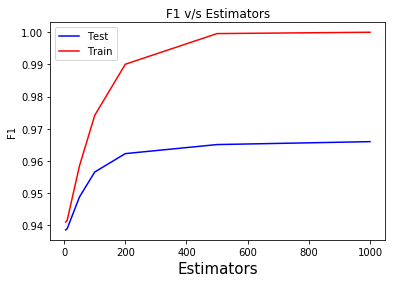

In [100]:
gsv = openfile('lightgbm_gridsearch')

x1=[]
y1=[]
x2=[]
y2=[]
gsv.cv_results_
means = gsv.cv_results_['mean_test_score']
means_train = gsv.cv_results_['mean_train_score']
stds = gsv.cv_results_['std_test_score']
for mean, mean_train ,  std, params in zip(means, means_train,stds, gsv.cv_results_['params']):

    if params['max_depth'] == 10:
        x1.append(params['n_estimators'])
        y1.append(mean)
        x2.append(params['n_estimators'])
        y2.append(mean_train)

        

plt.xlabel("Estimators",fontsize=15)
plt.ylabel("F1")
plt.title('F1 v/s Estimators')

plt.plot(x1,y1,'b',label="Test")
plt.plot(x2,y2,'r',label="Train")
plt.legend()
plt.show()

In [101]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

clf = lgb.LGBMClassifier(  max_depth=4 , n_estimators=1000 , n_jobs=-1)

# fitting the model
clf.fit(df_train,y_train)

# predict the response
pred = clf.predict(df_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the RF for max_depth = %f is %f%%' % (4, acc))


The accuracy of the RF for max_depth = 4.000000 is 96.886125%


In [102]:
y_train_pred = clf.predict(df_train)
y_test_pred = clf.predict(df_test)

In [103]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9957226698497961
Test f1 score 0.9694975022039377


Train confusion_matrix


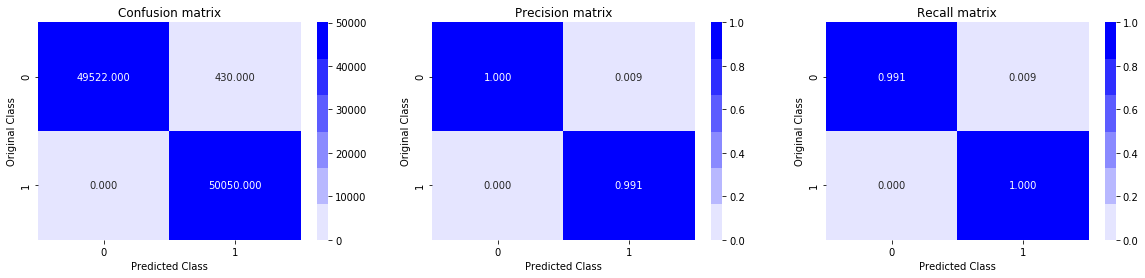

Test confusion_matrix


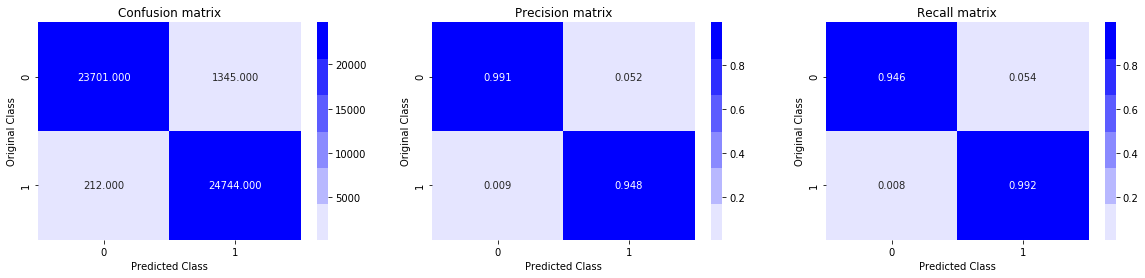

In [104]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

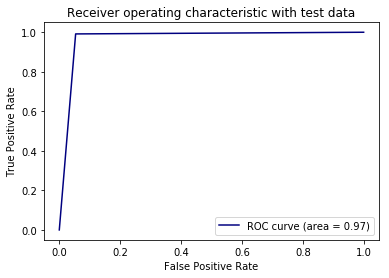

In [105]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

## Conclusion:

- For link prediction we can create manual features which includes various algorithms like PageRank , Kartz , Hitz score ,etc to get the information of graph. 
- To solve this problem , used Networkx library to create a graph from the data of connected edges .
- Two types of graph are there : Directed and Undirected . Our problem consists the information of followers which means it is a directed graph .
- In networkx , there are many functions which we can use to create manual features . Here we added addtional 52 features with the help of networkx . Because the information of  edges is not so important if we dont know the information of entire graph . So these additional features contain information like connected neighbours , nearest neighbours , etc . 
- In 2016 , node2vec paper was published (works similar as word2vec) which describes the generation of Random Walks based on the data of connected graphs . In node2vec , we have to decide the length of random walk and also number of random walks . Then it feeds the data of random walks into word2vec . It is same as feeding sentence in word2vec and than the algorithm creates embedding of words based on the context of word . Similarly node2vec creates embedding of nodes based on data of edges . 
- So instead of using manual features , used embedding and trained the model . 
- Lightgbm was performing better than XGBoost and also it is fast as compare to XGBoost . So used Lightgbm for hyperparameter tuning . 
- Got F1 score of 0.9694 for embedding features .

In [106]:
models = pd.DataFrame({'Feature': ['Manual', "Embedding" ,"Embedding" ,  "Embedding","Embedding" ],'Model':['RF','XGBoost','RF','Lightgbm','Lightgbm-tuned']\
                       ,'F1': [0.965,0.95,0.93,0.97,0.99], 'F1_Test':[0.92,0.946,0.9377,0.956,0.969] }, \
                      columns = ["Feature", "Model","F1", "F1_Test"])
models

,Feature,Model,F1,F1_Test
0,Manual,RF,0.965,0.9200
1,Embedding,XGBoost,0.950,0.9460
2,Embedding,RF,0.930,0.9377
3,Embedding,Lightgbm,0.970,0.9560
4,Embedding,Lightgbm-tuned,0.990,0.9690
